#### Notebook setup

In [12]:
# %load ~/software/fullwavepy/fullwavepy/config/jupyter.py
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(ERROR) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [13]:
plt.style.use(['default', 
#                'seaborn-dark',
               'dark_background'
              ])
import matplotlib
font = {'family' : 'sans-serif', # serif
        'weight' : 'normal', # bold
        'size'   : 20}
matplotlib.rc('font', **font)

In [15]:
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)

## Data

In [14]:
fit = p14.o.fit.read(run_ids=[1,2])

#### No. of traces per OBS

In [17]:
hd = p14.i.obs.read_header()

In [25]:
len(hd.fldr.unique())

1481

In [26]:
mean = 0
n = 0
for tracf in hd.tracf.unique():
    ntr = len(hd.loc[hd.tracf==tracf])
    print(ntr)
    mean += ntr
    n += 1
mean /= n
mean

914
925
934
961
930
879
950
1051
1007
1044
1037
900
1071
949
1144
936


977.0

## Summary figure

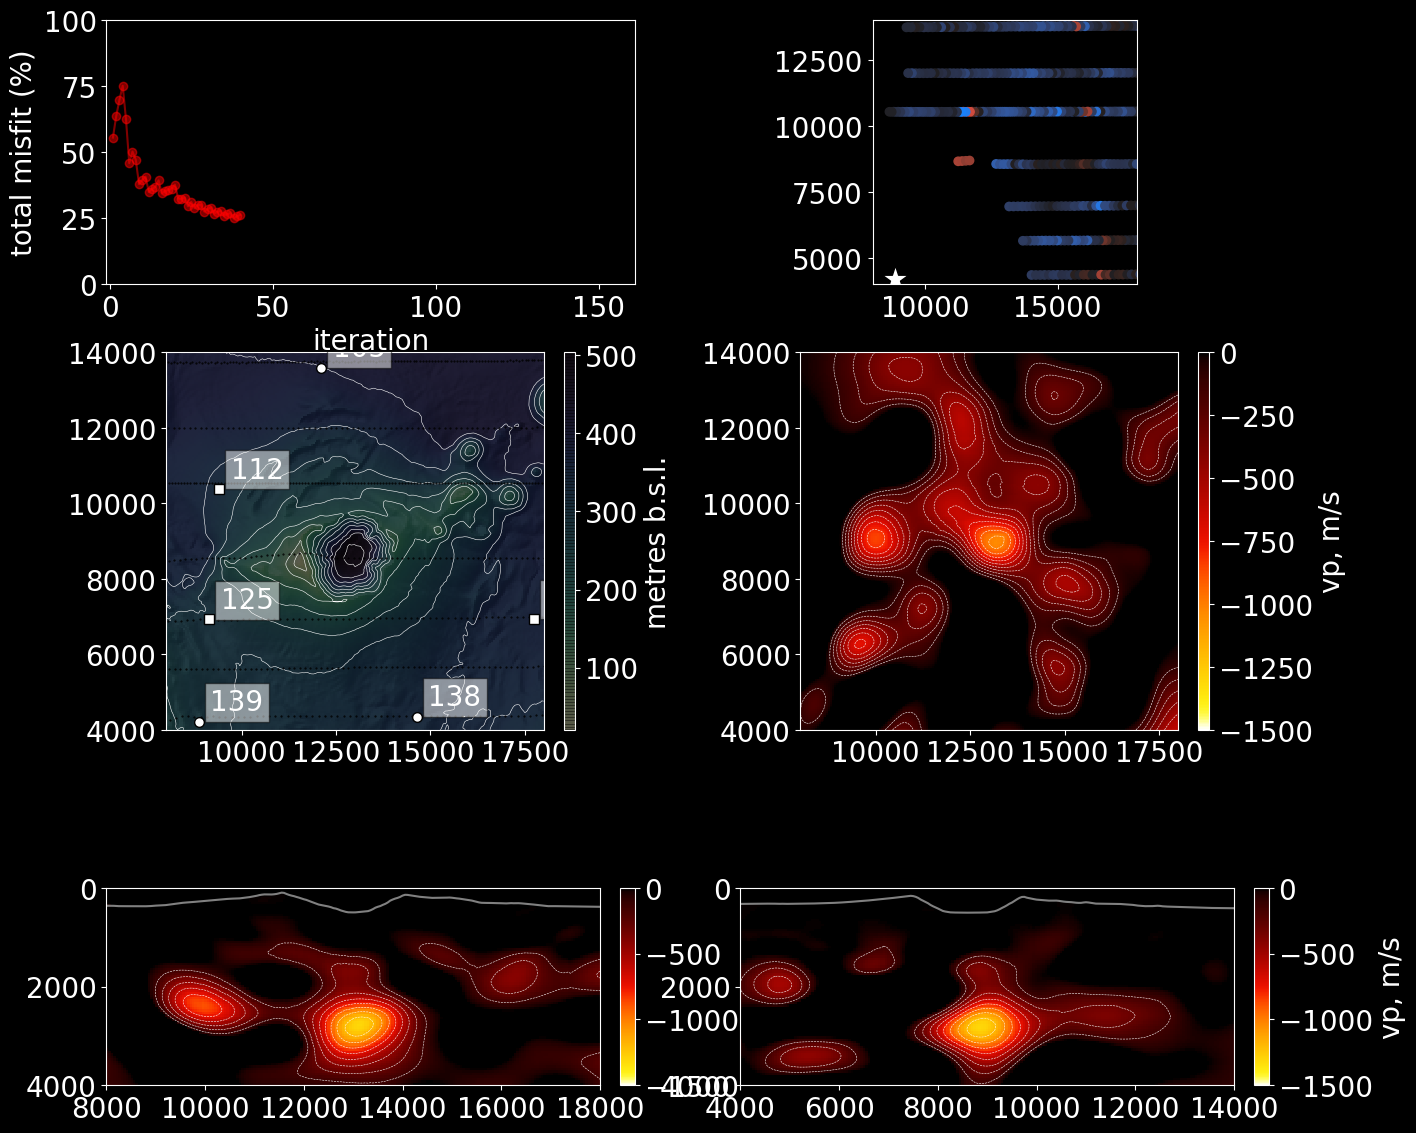

In [72]:
# code 
it = 40
sid = 4139
from matplotlib.gridspec import GridSpec
gs = GridSpec(3,2, height_ratios=[.7,1,1]) 
#left=0, right=1, hspace=.1, wspace=.4) # width_ratios=[1, 2], )
fig = figure(15,15)
ax = fig.add_subplot(gs[0,0])
plot_fit(fit, it, [sid])
ax = fig.add_subplot(gs[0,1])
plot_phase(p14, it, sid, 3, x1, x2, y1, y2)    
ax = fig.add_subplot(gs[1,0])
plot_bathy(bt_zoom, srcs, recs, sio, who, lan, x1, x2, y1, y2)
ax = fig.add_subplot(gs[1,1])
plot_mod(it, axis=2, value=2.5e3, vmin=-1.5e3)
ax = fig.add_subplot(gs[2,0])
plot_mod(it, axis=1, value=9e3, vmin=-1.5e3)
ax = fig.add_subplot(gs[2,1])
plot_mod(it, axis=0, value=13e3, vmin=-1.5e3)

# ...